In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import random
random.seed(42)

In [3]:
data_train = pd.read_csv("25Wafer_10LayerVariation_SNR30db_train.csv", skiprows=4, header=None)

In [4]:
data_train.shape

(98250, 602)

In [5]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,592,593,594,595,596,597,598,599,600,601
0,1.04360,0.77653,0.84672,0.83199,1.52820,1.28200,1.03750,1.28180,0.98114,0.92108,...,0.55489,0.55656,0.50621,0.40879,0.50317,0.59060,0.41935,0.50326,0.51321,1500
1,1.06020,0.71712,0.90560,1.14410,1.07980,0.94290,0.95501,1.06060,1.23440,1.06240,...,0.49716,0.57034,0.55974,0.57759,0.43101,0.46000,0.52845,0.55909,0.46235,1500
2,0.05587,0.77704,0.75296,0.54951,0.84628,0.63615,0.93858,0.71361,0.92573,0.88881,...,0.35918,0.51248,0.45673,0.37929,0.50958,0.43262,0.53272,0.52882,0.38007,1500
3,0.57876,0.75194,0.77168,0.49729,0.95006,0.88738,0.85901,0.66705,1.15360,0.79081,...,0.47656,0.57479,0.53811,0.58468,0.52504,0.42394,0.48927,0.59442,0.50571,1500
4,0.63567,0.91243,0.64593,0.94196,0.85344,0.79872,0.91289,0.92319,1.01480,1.00150,...,0.58752,0.55076,0.51340,0.59283,0.48574,0.55767,0.49496,0.49007,0.44945,1500


In [6]:
data_train.iloc[:,-1].unique()

array([1500, 1490, 1480, 1470, 1460, 1450, 1440, 1430, 1420, 1410, 1400,
       1390, 1380, 1370, 1360, 1350, 1340, 1330, 1320, 1310, 1300, 1290,
       1280, 1270, 1260, 1250, 1240, 1230, 1220, 1210, 1200, 1190, 1180,
       1170, 1160, 1150, 1140, 1130, 1120, 1110, 1100, 1090, 1080, 1070,
       1060, 1050, 1040, 1030, 1020, 1010, 1000,  990,  980,  970,  960,
        950,  940,  930,  920,  910,  900,  890,  880,  870,  860,  850,
        840,  830,  820,  810,  800,  790,  780,  770,  760,  750,  740,
        730,  720,  710,  700,  690,  680,  670,  660,  650,  640,  630,
        620,  610,  600,  590,  580,  570,  560,  550,  540,  530,  520,
        510,  500,  490,  480,  470,  460,  450,  440,  430,  420,  410,
        400,  390,  380,  370,  360,  350,  340,  330,  320,  310,  300,
        290,  280,  270,  260,  250,  240,  230,  220,  210,  200],
      dtype=int64)

In [7]:
X_train = data_train.iloc[:,:-1]

In [8]:
X_train.shape

(98250, 601)

In [9]:
y_train = data_train.iloc[:,-1][::30]

In [10]:
y_train = y_train.reset_index(drop=True); y_train

0       1500
1       1490
2       1480
3       1470
4       1460
        ... 
3270     240
3271     230
3272     220
3273     210
3274     200
Name: 601, Length: 3275, dtype: int64

In [11]:
X_train["ID"] = 0

In [12]:
v = 131
n = 30
m=n*v

for k in range(25):
    t = k + 1
    X_train.loc[k*m:(k+1)*m, "ID"] = t

In [13]:
X_train["MS"] = 0

In [14]:
n = 30
v = 131

for k in range(25):
    for h in range(v):
        t = h+1
        X_train.loc[k*v*n+h*n:k*v*n+(h+1)*n, "MS"] = t

In [15]:
X_train.shape, y_train.shape

((98250, 603), (3275,))

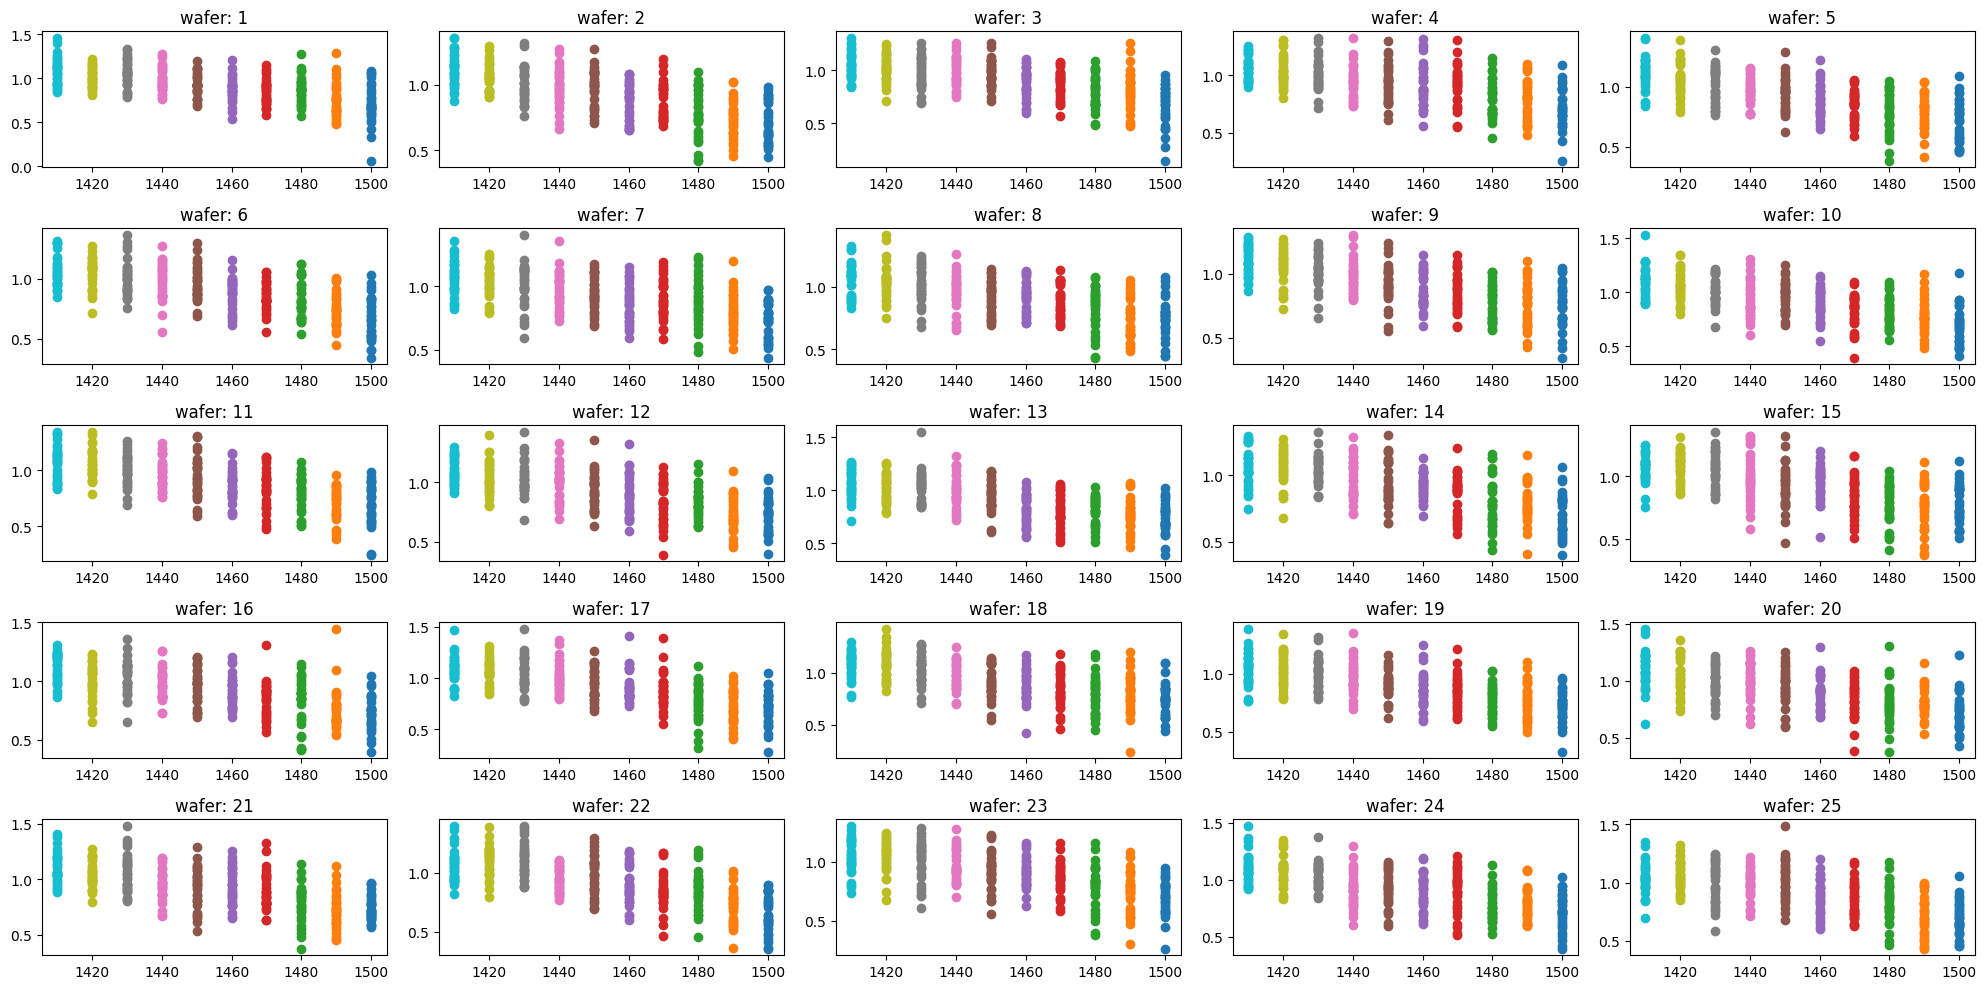

In [16]:
n = 30
v = 131

fig, axes = plt.subplots(5 ,5, figsize = (20,10))
for i, ax in enumerate(axes.ravel()):
    for j in range(10):
        y = np.ones([30])*y_train[i*v+j]
        X_col = X_train.iloc[i*v*n+j*n:i*v*n+j*n+30, j]
        ax.scatter(y, X_col)
    ax.set_title("wafer: {}".format(i+1))
plt.tight_layout()

In [17]:
X_train.tail()

,0,1,2,3,4,5,6,7,8,9,...,593,594,595,596,597,598,599,600,ID,MS
98245,0.68631,0.91642,0.90464,0.85301,0.95114,0.89899,1.08110,1.0237,0.94600,1.02610,...,0.53944,0.60875,0.50591,0.57991,0.57833,0.53401,0.57810,0.58680,25,131
98246,0.86491,0.65617,0.69830,0.79086,0.91662,1.35400,0.89143,1.0288,0.96368,1.08450,...,0.62847,0.60407,0.49173,0.49546,0.60131,0.58289,0.47510,0.49313,25,131
98247,0.93777,1.01270,0.66554,1.04980,0.91083,0.89720,0.96755,1.2541,0.99694,1.07500,...,0.45366,0.50592,0.62256,0.44979,0.52742,0.41505,0.48654,0.58904,25,131
98248,0.52432,0.64420,0.76914,0.70828,0.65142,0.75602,0.82259,0.9085,0.92530,0.93503,...,0.44423,0.45756,0.40662,0.55855,0.50366,0.57985,0.53868,0.38712,25,131
98249,0.58703,0.66444,0.83798,0.87480,0.87074,0.52080,0.94405,1.1718,0.90025,0.80779,...,0.60806,0.58302,0.48078,0.56385,0.55903,0.51622,0.55134,0.59615,25,131


In [18]:
yy = X_train.groupby(["ID","MS"], as_index=False).mean()

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
yy.shape, y_train.shape

((3275, 603), (3275,))

In [21]:
yyd = yy.drop("MS", axis = 1)

In [22]:
yyd.columns = yyd.columns.map(str)
yyd.astype(float)
yyd = yyd.astype({"ID": str})

In [23]:
yyd.shape

(3275, 602)

In [24]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

t = 601

numeric_features = list(yyd.columns[1:t])
numeric_transformer = Pipeline(steps = [
    ("scaler", StandardScaler())])

categorical_features = ["ID"]
categorical_transformer = Pipeline(steps = [
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
    transformers = [("num", numeric_transformer, numeric_features),
                   ("cat", categorical_transformer, categorical_features)], remainder = "passthrough")

clf1 = Pipeline(steps = [("preprocessor", preprocessor),
                        ("regressor", LinearRegression())])

clf1.fit(yyd.iloc[:,:t], y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['0', '1', '2', '3', '4', '5',
                                                   '6', '7', '8', '9', '10',
                                                   '11', '12', '13', '14', '15',
                                                   '16', '17', '18', '19', '20',
                                                   '21', '22', '23', '24', '25',
                                                   '26', '27', '28', '29', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ID'])])),
                ('regressor', LinearRegression())])

In [25]:
clf1.score(yyd, y_train)

0.9995758464449668

In [26]:
from sklearn.model_selection import train_test_split

X_traind, X_testd, y_traind, y_testd = train_test_split(yyd, y_train, \
                                                       test_size=0.2, random_state=42)

t = 601

from sklearn.linear_model import LinearRegression

model = clf1.fit(X_traind.iloc[:,:t], y_traind)
y_pred = model.predict(X_testd.iloc[:,:t])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2_score = r2_score(y_testd, y_pred)
mae = mean_absolute_error(y_testd, y_pred)
mse = mean_squared_error(y_testd, y_pred)
rmse = np.sqrt(mean_squared_error(y_testd, y_pred))

print(f"{r2_score:},{mae:},{mse:},{rmse}")

0.9992528760153546,7.882439841932923,105.01011648939827,10.247444388207153


In [27]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_validate(clf1, yyd, y_train,\
                       scoring = ["r2", "neg_mean_absolute_error",\
                                 "neg_mean_squared_error",\
                                 "neg_root_mean_squared_error"],\
                       cv = 10)

In [28]:
scores

{'fit_time': array([0.39170647, 0.37878561, 0.3812356 , 0.39024639, 0.38017011,
        0.38253403, 0.37310338, 0.37484765, 0.38777637, 0.37221599]),
 'score_time': array([0.01199317, 0.01200676, 0.01199412, 0.01198745, 0.01200676,
        0.01200247, 0.01200724, 0.01200986, 0.01199293, 0.01200652]),
 'test_r2': array([-8.68706380e+18, -8.07817191e+17, -7.59640525e+17, -1.49068651e+16,
        -1.93516271e+17, -3.26462015e+17, -4.51427129e+15, -3.07827752e+18,
        -1.84949125e+18, -2.51986165e+18]),
 'test_neg_mean_absolute_error': array([-9.80355238e+11, -3.00614427e+11, -2.04228934e+11, -4.10538155e+10,
        -1.02705141e+11, -1.92705776e+11, -1.57333476e+10, -5.88599274e+11,
        -3.19624032e+11, -5.29591374e+11]),
 'test_neg_mean_squared_error': array([-1.20320464e+24, -1.13133752e+23, -1.04432840e+23, -2.10998616e+21,
        -2.64111258e+22, -4.63485257e+22, -6.17900767e+20, -4.32400219e+23,
        -2.55008882e+23, -3.50048537e+23]),
 'test_neg_root_mean_squared_error':

In [29]:
scores_lin = []
v = 131

for k in range(25):
    yyd_lin = yyd.iloc[k*v:k*v+v]
    y_train_lin = y_train[k*v:k*v+v]
    yyd_restlin=pd.concat([yyd, yyd_lin]).drop_duplicates(keep=False)
    y_train_restlin = np.array(pd.concat([y_train[0:k*v],y_train[k*v+v:]]))
    clf1.fit(yyd_restlin, y_train_restlin)
    scores_lin.append(clf1.score(yyd_lin, y_train_lin))

In [30]:
scores_lin

[-2.600581067090165e+18,
 -1.48395540879385e+18,
 -2.8375419543737923e+18,
 -3.726347754590623e+18,
 -2.7437452156557727e+18,
 -1.3429994635031578e+18,
 -6.552483297204452e+18,
 -3.4391940586699254e+18,
 -2.1855495881538985e+18,
 -1.432671050503912e+17,
 -2.0824794786183805e+18,
 -1.8668544924817117e+17,
 -1.170811491294406e+18,
 -5.347404566090101e+18,
 -3.53019412841081e+18,
 -3.172091334981854e+18,
 -3.85800405245735e+17,
 -4716808101773923.0,
 -8.481221211410472e+17,
 -1.0395957341425418e+17,
 -1.7364340636139277e+18,
 -4.4540448309931197e+18,
 -1.8758117119551521e+18,
 -5436176644353199.0,
 -6.873066993265897e+17]

In [31]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

t = 601

numeric_features = list(yyd.columns[1:t])
numeric_transformer2 = Pipeline(steps = [
    ("scaler", StandardScaler()), ("reduce_dim", PCA(n_components = 10))])

categorical_features = ["ID"]
categorical_transformer = Pipeline(steps = [
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocessor2 = ColumnTransformer(
    transformers = [("num2", numeric_transformer2, numeric_features),
                   ("cat", categorical_transformer, categorical_features)], remainder = "passthrough")

clf2 = Pipeline(steps = [("preprocessor2", preprocessor2),
                        ("regressor", LinearRegression())])

clf2.fit(yyd.iloc[:,:t], y_train)

Pipeline(steps=[('preprocessor2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num2',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('reduce_dim',
                                                                   PCA(n_components=10))]),
                                                  ['0', '1', '2', '3', '4', '5',
                                                   '6', '7', '8', '9', '10',
                                                   '11', '12', '13', '14', '15',
                                                   '16', '17', '18', '19', '20',
                                                   '21', '22', '23', '24', '25',
                                                   '26', '27', '28', '29', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ID'])])),
                ('regressor', LinearRegression())])

In [32]:
from sklearn.model_selection import cross_val_score

scores2 = cross_val_score(clf2, yyd, y_train, cv = 10)
np.mean(scores2), np.std(scores2)

(0.9947312044921464, 0.0050770051918826355)

In [33]:
yhat1 = clf2.predict(yyd.iloc[:,:t])

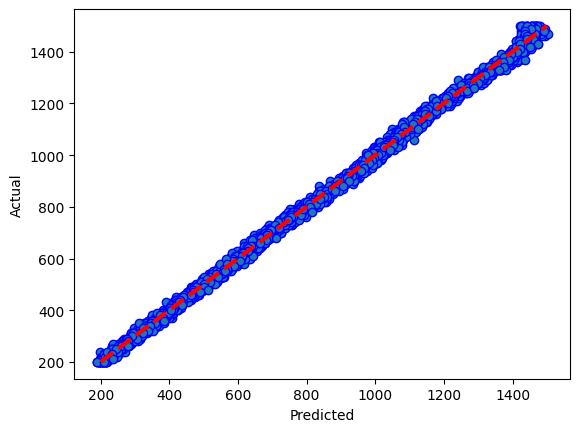

In [34]:
fig, ax = plt.subplots()
ax.scatter(yhat1, y_train, edgecolors=(0, 0, 1))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "r--", lw=3)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()

In [35]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_train, yhat1)
mse = metrics.mean_squared_error(y_train, yhat1)
r2 = metrics.r2_score(y_train, yhat1)

print("The model performance for training set")
print("--------------------------------------")
print("MAE is {}".format(mae))
print("MSE is {}".format(mse))
print("R2 is {}".format(r2))

The model performance for training set
--------------------------------------
MAE is 12.541478184907557
MSE is 260.6396553807674
R2 is 0.9981773450672674


In [36]:
numeric_features = list(yyd.columns[1:t])
numeric_transformer2 = Pipeline(steps = [
    ("scaler", StandardScaler()), ("reduce_dim", PCA(n_components = 10))])

categorical_features = ["ID"]
categorical_transformer = Pipeline(steps = [
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocessor2 = ColumnTransformer(
    transformers = [("num2", numeric_transformer2, numeric_features),
                   ("cat", categorical_transformer, categorical_features)], remainder = "passthrough")

clf3 = Pipeline(steps = [("preprocessor2", preprocessor2),
                        ("regressor", LinearRegression())])

In [37]:
scores3 = []
v = 131

for k in range(25):
    yyd_i = yyd.iloc[k*v:k*v+v]
    y_train_i = y_train.iloc[k*v:k*v+v]
    yyd_rest = pd.concat([yyd,yyd_i]).drop_duplicates(keep=False)
    y_train_rest = np.array(pd.concat([y_train[0:k*v], y_train[k*v+v:]]))
    clf3.fit(yyd_rest, y_train_rest)
    scores3.append(clf2.score(yyd_i, y_train_i))


In [38]:
np.array(scores3).mean(), np.array(scores3).std()

(0.9981773450672675, 0.00016804634629551013)

In [39]:
yhatmodel1 = clf2.predict(yyd)

In [40]:
yhatmodel1.shape

(3275,)

In [41]:
yyd_with_hat = yyd.copy()

In [42]:
yyd_with_hat["yhatmodel1"] = yhatmodel1

In [43]:
yyd_with_hat["yhatmodel1_s"] = yyd_with_hat.groupby(["ID"])["yhatmodel1"].shift(1)

In [44]:
yyd_with_hat.head()

,ID,0,1,2,3,4,5,6,7,8,...,593,594,595,596,597,598,599,600,yhatmodel1,yhatmodel1_s
0,1,0.698106,0.763157,0.776748,0.832544,0.914430,0.916932,0.944375,0.934293,1.009005,...,0.540553,0.521360,0.531954,0.501646,0.515534,0.534039,0.539064,0.525850,1463.307676,NaN
1,1,0.729856,0.751451,0.827925,0.801372,0.852115,0.927645,0.951585,0.984030,1.012301,...,0.511890,0.507746,0.508945,0.523448,0.501185,0.540460,0.511928,0.526840,1459.032627,1463.307676
2,1,0.669586,0.733506,0.868904,0.841791,0.832750,0.914250,0.933147,1.008497,1.028314,...,0.541548,0.536088,0.520284,0.510242,0.509127,0.529585,0.545440,0.525062,1456.619188,1459.032627
3,1,0.762774,0.802765,0.803625,0.847220,0.929512,0.954482,0.998781,1.015917,1.023009,...,0.516289,0.501284,0.505742,0.540932,0.528400,0.521195,0.539930,0.517142,1443.080989,1456.619188
4,1,0.714084,0.810382,0.775471,0.806111,0.873733,0.946925,0.942013,0.979679,1.000049,...,0.513057,0.535731,0.515139,0.499030,0.524250,0.540792,0.515419,0.521071,1429.817562,1443.080989


In [45]:
yyd_with_hat_final = yyd_with_hat.dropna()
yyd_with_hat_final = yyd_with_hat_final.drop(["yhatmodel1"], axis=1)

In [46]:
y_train2 = np.array([y_train[j] for j in range(len(y_train)) if j%131 != 0])  #1500 olanları çıkardıdık

In [47]:
y_train2.shape, yyd_with_hat_final.shape

((3250,), (3250, 603))

In [48]:
yyd_with_hat_final.head()

,ID,0,1,2,3,4,5,6,7,8,...,592,593,594,595,596,597,598,599,600,yhatmodel1_s
1,1,0.729856,0.751451,0.827925,0.801372,0.852115,0.927645,0.951585,0.984030,1.012301,...,0.525890,0.511890,0.507746,0.508945,0.523448,0.501185,0.540460,0.511928,0.526840,1463.307676
2,1,0.669586,0.733506,0.868904,0.841791,0.832750,0.914250,0.933147,1.008497,1.028314,...,0.514493,0.541548,0.536088,0.520284,0.510242,0.509127,0.529585,0.545440,0.525062,1459.032627
3,1,0.762774,0.802765,0.803625,0.847220,0.929512,0.954482,0.998781,1.015917,1.023009,...,0.517677,0.516289,0.501284,0.505742,0.540932,0.528400,0.521195,0.539930,0.517142,1456.619188
4,1,0.714084,0.810382,0.775471,0.806111,0.873733,0.946925,0.942013,0.979679,1.000049,...,0.507005,0.513057,0.535731,0.515139,0.499030,0.524250,0.540792,0.515419,0.521071,1443.080989
5,1,0.734868,0.781009,0.799552,0.850824,0.908510,0.928054,0.971433,1.024524,1.027336,...,0.529214,0.510011,0.537002,0.510141,0.502846,0.499722,0.521965,0.517660,0.524345,1429.817562


In [49]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

t = 602

numeric_features = list(yyd_with_hat_final.columns[1:t])
numeric_transformer3 = Pipeline(steps = [
    ("scaler", StandardScaler()), ("reduce_dim", PCA(n_components = 10))])

categorical_features = ["ID"]
categorical_transformer = Pipeline(steps = [
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocessor3 = ColumnTransformer(
    transformers = [("num3", numeric_transformer3, numeric_features),
                   ("cat", categorical_transformer, categorical_features)], remainder = "passthrough")

clf3 = Pipeline(steps = [("preprocessor3", preprocessor3),
                        ("regressor", LinearRegression())])

clf3.fit(yyd_with_hat_final, y_train2)

Pipeline(steps=[('preprocessor3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num3',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('reduce_dim',
                                                                   PCA(n_components=10))]),
                                                  ['0', '1', '2', '3', '4', '5',
                                                   '6', '7', '8', '9', '10',
                                                   '11', '12', '13', '14', '15',
                                                   '16', '17', '18', '19', '20',
                                                   '21', '22', '23', '24', '25',
                                                   '26', '27', '28', '29', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ID'])])),
                ('regressor', LinearRegression())])

In [50]:
from sklearn.model_selection import cross_val_score

scores4 = cross_val_score(clf3, yyd_with_hat_final, y_train2, cv = 10)
np.mean(scores4), np.std(scores4)

(0.9988666983991713, 0.00011891683685971449)

In [51]:
np.mean(scores2), np.std(scores2)

(0.9947312044921464, 0.0050770051918826355)

In [52]:
yhat2 = clf3.predict(yyd_with_hat_final)

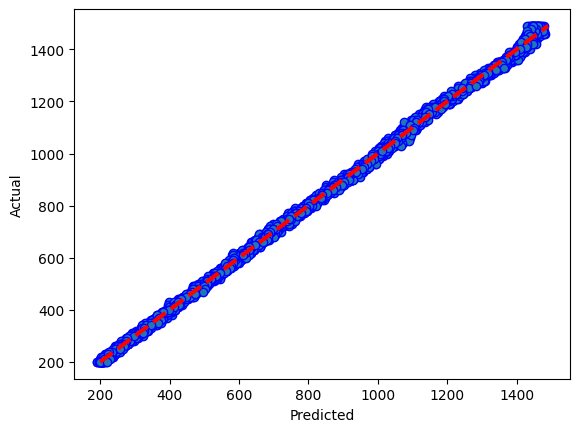

In [53]:
fig, ax = plt.subplots()
ax.scatter(yhat2, y_train2, edgecolors=(0, 0, 1))
ax.plot([y_train2.min(), y_train2.max()], [y_train2.min(), y_train2.max()], "r--", lw=3)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()

In [54]:
from sklearn import metrics

mae2 = metrics.mean_absolute_error(y_train2, yhat2)
mse2 = metrics.mean_squared_error(y_train2, yhat2)
r22 = metrics.r2_score(y_train2, yhat2)

print("The model performance for training set")
print("--------------------------------------")
print("MAE is {}".format(mae2))
print("MSE is {}".format(mse2))
print("R2 is {}".format(r22))

The model performance for training set
--------------------------------------
MAE is 9.574850670898055
MSE is 153.3265287269094
R2 is 0.9989112264958145


In [55]:
data_test = pd.read_csv("1Wafer_10LayerVariation_SNR30db_validate.csv", skiprows=4, header = None)

In [56]:
data_test.shape

(3930, 602)

In [57]:
X_test = data_test.iloc[:,:-1]

In [58]:
y_test = data_test.iloc[:,-1][::30]

In [59]:
y_test = y_test.reset_index(drop=True)

In [60]:
X_test["ID"] = 26

In [61]:
X_test["MS"] = 0

In [62]:
v = 131
n = 30

for k in range(1):
    for h in range(v):
        t = h + 1
        X_test.loc[k*v*n+h*n:k*v*n+(h+1)*n, "MS"] = t

In [63]:
yy_test = X_test.groupby(["ID","MS"], as_index=False).mean()

In [64]:
yyd_test = yy_test.drop("MS", axis = 1 )

In [65]:
yyd_test.columns = yyd_test.columns.map(str)
yyd_test.astype(float)
yyd_test = yyd_test.astype({"ID" : str})

In [66]:
yyd_test.shape, y_test.shape

((131, 602), (131,))

In [67]:
t = 601

from sklearn.linear_model import LinearRegression

model = clf1.fit(X_traind.iloc[:,:t], y_traind)
y_pred = model.predict(yyd_test.iloc[:,:t])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2_score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"{r2_score:},{mae:},{mse:},{rmse}")

-2096568050945519.8,17315000181.496086,2.9980923128520946e+20,17315000181.496086


In [70]:
yyd_test_hat1 = clf2.predict(yyd_test)

In [71]:
test_per_1 = clf2.score(yyd_test, y_test)
print(test_per_1)

0.9984122246398127


In [72]:
yyd_test.shape

(131, 602)

In [73]:
yyd_test["yhatmodel1_s"] = 0

C:\Users\ITU\AppData\Local\Temp\ipykernel_6568\2004221955.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  yyd_test["yhatmodel1_s"] = 0


In [74]:
y_test_hat = np.zeros((1, len(y_test)))

In [75]:
yyd_test.head()

,ID,0,1,2,3,4,5,6,7,8,...,592,593,594,595,596,597,598,599,600,yhatmodel1_s
0,26,0.708155,0.756279,0.777899,0.826475,0.899670,0.896718,0.883709,0.997707,0.983153,...,0.519332,0.516157,0.511255,0.516492,0.511910,0.538570,0.484445,0.523441,0.542763,0
1,26,0.704524,0.763662,0.785725,0.791389,0.860336,0.945106,0.979460,0.991308,0.996576,...,0.533942,0.531420,0.534192,0.509800,0.530784,0.506402,0.527283,0.524676,0.513950,0
2,26,0.742409,0.751802,0.772612,0.830536,0.853155,0.919472,0.919624,0.976721,1.023153,...,0.516983,0.507212,0.508562,0.499190,0.545180,0.507394,0.526546,0.530488,0.519352,0
3,26,0.701768,0.769347,0.822079,0.806553,0.846300,0.915416,0.966247,0.974285,1.019808,...,0.531485,0.515255,0.512869,0.525337,0.516053,0.499500,0.503480,0.527393,0.504781,0
4,26,0.795713,0.817358,0.833444,0.878344,0.908524,0.959992,1.008236,1.028728,1.054737,...,0.523746,0.532654,0.508315,0.513620,0.535439,0.543727,0.516408,0.538905,0.524349,0


In [76]:
y_test_hat = np.zeros(len(y_test))

In [83]:
col1 = yyd_test.columns[:602]
y_test_0 = pd.DataFrame(np.array(yyd_test.iloc[0,:602]).reshape((-1,1)).T, columns=col1)
y_test_hat[0] = clf2.predict(y_test_0)

In [84]:
yyd_test.loc[1,"yhatmodel1_s"] = y_test_hat[0]

In [86]:
col2 = yyd_test.columns[:603]
for i in range(len(y_test)-1):
    k = i + 1
    yyd_test.loc[k,"yhatmodel1_s"] = y_test_hat[i]
    y_test_i = pd.DataFrame(np.array(yyd_test.iloc[k,:603]).reshape((-1,1)).T, columns=col2)
    y_test_hat[k] = clf3.predict(y_test_i)

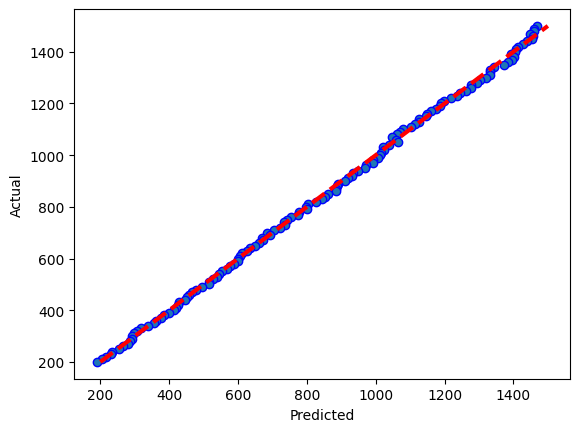

In [87]:
fig, ax = plt.subplots()
ax.scatter(y_test_hat, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=3)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()

In [90]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

mae3 = mean_absolute_error(y_test, y_test_hat)
mse3 = mean_squared_error(y_test, y_test_hat)
r23 = r2_score(y_test, y_test_hat)

print("The model performance for test set")
print("--------------------------------------")
print("MAE is {}".format(mae3))
print("MSE is {}".format(mse3))
print("R2 is {}".format(r23))

The model performance for test set
--------------------------------------
MAE is 8.861600777473496
MSE is 126.1460521001034
R2 is 0.9991178597755237
